## Data Visualization Using Python
##### Ekwe Collins Odinaka

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS
import urllib
from PIL import Image
import folium
import io
import json
import plotly.express as px
import plotly.graph_objects as go

### Basic Visualization Tools

#### Line plots:

Plot that displays information as a series of points called `markers` connected by a line segment.

They are used for continous dataset and we are interested in visualizing the data over a period of time. E.G Plot for immigration moves from haiti to canada in the period 1980-2013.

In [243]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

df = pd.read_excel(URL, sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

df.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [244]:
df.shape

(195, 43)

In [245]:
df.isnull().sum()

Type        0
Coverage    0
OdName      0
AREA        0
AreaName    0
REG         0
RegName     0
DEV         0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
dtype: int64

In [246]:
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.head(2)

Type    Coverage      Country  AREA Continent   REG           Region  \
0  Immigrants  Foreigners  Afghanistan   935      Asia  5501    Southern Asia   
1  Immigrants  Foreigners      Albania   908    Europe   925  Southern Europe   

   DEV             DevName  1980  ...  2004  2005  2006  2007  2008  2009  \
0  902  Developing regions    16  ...  2978  3436  3009  2652  2111  1746   
1  901   Developed regions     1  ...  1450  1223   856   702   560   716   

   2010  2011  2012  2013  
0  1758  2203  2635  2004  
1   561   539   620   603  

[2 rows x 43 columns]

In [247]:
df[['Continent']]

Continent
0        Asia
1      Europe
2      Africa
3     Oceania
4      Europe
..        ...
190      Asia
191    Africa
192      Asia
193    Africa
194    Africa

[195 rows x 1 columns]

In [248]:
df['Total'] = df.sum(axis=1)

df.head(2)

<ipython-input-248-2ad65162abac>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Type    Coverage      Country  AREA Continent   REG           Region  \
0  Immigrants  Foreigners  Afghanistan   935      Asia  5501    Southern Asia   
1  Immigrants  Foreigners      Albania   908    Europe   925  Southern Europe   

   DEV             DevName  1980  ...  2005  2006  2007  2008  2009  2010  \
0  902  Developing regions    16  ...  3436  3009  2652  2111  1746  1758   
1  901   Developed regions     1  ...  1223   856   702   560   716   561   

   2011  2012  2013  Total  
0  2203  2635  2004  65977  
1   539   620   603  18433  

[2 rows x 44 columns]

In [249]:
df.columns = list(map(str, df.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

In [250]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [251]:
Latin = df['Continent'] == 'Latin America and the Caribbean'
df[Latin]

Type    Coverage                             Country  AREA  \
6    Immigrants  Foreigners                 Antigua and Barbuda   904   
7    Immigrants  Foreigners                           Argentina   904   
12   Immigrants  Foreigners                             Bahamas   904   
15   Immigrants  Foreigners                            Barbados   904   
18   Immigrants  Foreigners                              Belize   904   
21   Immigrants  Foreigners    Bolivia (Plurinational State of)   904   
24   Immigrants  Foreigners                              Brazil   904   
35   Immigrants  Foreigners                               Chile   904   
39   Immigrants  Foreigners                            Colombia   904   
42   Immigrants  Foreigners                          Costa Rica   904   
45   Immigrants  Foreigners                                Cuba   904   
52   Immigrants  Foreigners                            Dominica   904   
53   Immigrants  Foreigners                  Dominican Republic   904   
54   Immigrants  Foreigners                             Ecuador   904   
56   Immigrants  Foreigners                         El Salvador   904   
70   Immigrants  Foreigners                             Grenada   904   
71   Immigrants  Foreigners                           Guatemala   904   
74   Immigrants  Foreigners                              Guyana   904   
75   Immigrants  Foreigners                               Haiti   904   
76   Immigrants  Foreigners                            Honduras   904   
86   Immigrants  Foreigners                             Jamaica   904   
112  Immigrants  Foreigners                              Mexico   904   
125  Immigrants  Foreigners                           Nicaragua   904   
132  Immigrants  Foreigners                              Panama   904   
134  Immigrants  Foreigners                            Paraguay   904   
135  Immigrants  Foreigners                                Peru   904   
145  Immigrants  Foreigners               Saint Kitts and Nevis   904   
146  Immigrants  Foreigners                         Saint Lucia   904   
147  Immigrants  Foreigners    Saint Vincent and the Grenadines   904   
165  Immigrants  Foreigners                            Suriname   904   
175  Immigrants  Foreigners                 Trinidad and Tobago   904   
186  Immigrants  Foreigners                             Uruguay   904   
189  Immigrants  Foreigners  Venezuela (Bolivarian Republic of)   904   

                           Continent  REG           Region  DEV  \
6    Latin America and the Caribbean  915        Caribbean  902   
7    Latin America and the Caribbean  931    South America  902   
12   Latin America and the Caribbean  915        Caribbean  902   
15   Latin America and the Caribbean  915        Caribbean  902   
18   Latin America and the Caribbean  916  Central America  902   
21   Latin America and the Caribbean  931    South America  902   
24   Latin America and the Caribbean  931    South America  902   
35   Latin America and the Caribbean  931    South America  902   
39   Latin America and the Caribbean  931    South America  902   
42   Latin America and the Caribbean  916  Central America  902   
45   Latin America and the Caribbean  915        Caribbean  902   
52   Latin America and the Caribbean  915        Caribbean  902   
53   Latin America and the Caribbean  915        Caribbean  902   
54   Latin America and the Caribbean  931    South America  902   
56   Latin America and the Caribbean  916  Central America  902   
70   Latin America and the Caribbean  915        Caribbean  902   
71   Latin America and the Caribbean  916  Central America  902   
74   Latin America and the Caribbean  931    South America  902   
75   Latin America and the Caribbean  915        Caribbean  902   
76   Latin America and the Caribbean  916  Central America  902   
86   Latin America and the Caribbean  915        Caribbean  902   
112  Latin America and the Caribbean  916  Central Ame

In [252]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df.head(2)

Country Continent           Region             DevName  1980  1981  \
0  Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1      Albania    Europe  Southern Europe   Developed regions     1     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   

   2012  2013  Total  
0  2635  2004  65977  
1   620   603  18433  

[2 rows x 39 columns]

In [253]:
df.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df.reset_index()
df.head(3)

Continent           Region             DevName  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions    16    39    39   
Albania        Europe  Southern Europe   Developed regions     1     0     0   
Algeria        Africa  Northern Africa  Developing regions    80    67    71   

             1983  1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  \
Country                              ...                                       
Afghanistan    47    71   340   496  ...  3436  3009  2652  2111  1746  1758   
Albania         0     0     0     1  ...  1223   856   702   560   716   561   
Algeria        69    63    44    69  ...  3626  4807  3623  4005  5393  4752   

             2011  2012  2013  Total  
Country                               
Afghanistan  2203  2635  2004  65977  
Albania       539   620   603  18433  
Algeria      4325  3774  4331  72156  

[3 rows x 38 columns]

In [254]:
print('data dimensions:', df.shape)
print(df.columns)
df.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


Continent           Region             DevName  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions    16    39    39   
Albania        Europe  Southern Europe   Developed regions     1     0     0   

             1983  1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  \
Country                              ...                                       
Afghanistan    47    71   340   496  ...  3436  3009  2652  2111  1746  1758   
Albania         0     0     0     1  ...  1223   856   702   560   716   561   

             2011  2012  2013  Total  
Country                               
Afghanistan  2203  2635  2004  65977  
Albania       539   620   603  18433  

[2 rows x 38 columns]

In [255]:
df.index.name = None

In [256]:
haiti = df.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

In [257]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [258]:
plt.style.use(['seaborn'])

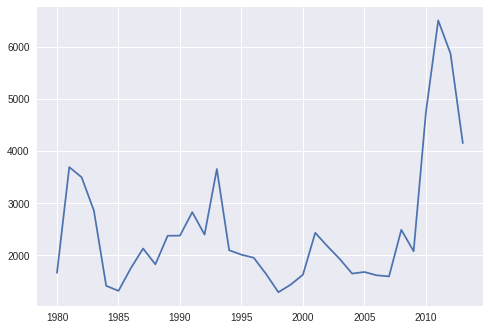

In [259]:
haiti.plot()

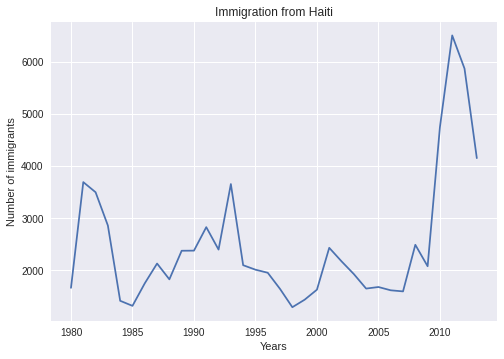

In [260]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

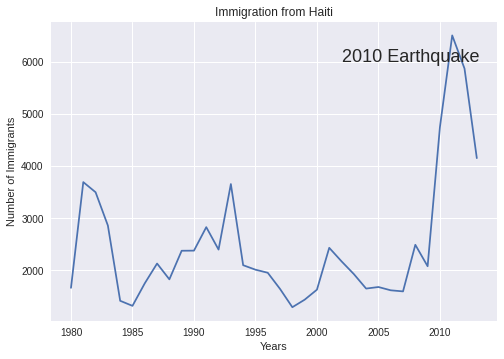

In [261]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2002, 6000, '2010 Earthquake') # see note below

plt.show()

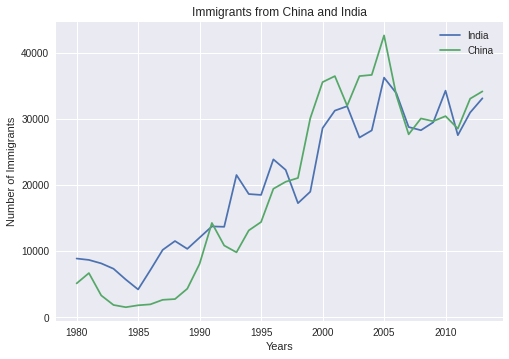

In [262]:
df_CI = df.loc[['India', 'China'], years]
df_CI = df_CI.transpose()

df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

*   `bar` for vertical bar plots
*   `barh` for horizontal bar plots
*   `hist` for histogram
*   `box` for boxplot
*   `kde` or `density` for density plots
*   `area` for area plots
*   `pie` for pie plots
*   `scatter` for scatter plots
*   `hexbin` for hexbin plot


#### Area Plot

Also known as `Area Chart` or `Area Graph` is a plot based off the `Line plot`.
It is commonly used to represent cumulated totals using numbers or percentages over time.

Lets look at the top 5 country with immigration to canada from `1980-2013` and plot an area plot

In [263]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_top5 = df.head()

In [264]:
df_top5

Continent  \
India                                                   Asia   
China                                                   Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Philippines                                             Asia   
Pakistan                                                Asia   

                                                                Region  \
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   

                                                               DevName   1980  \
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   

                                                     1981   1982   1983  \
India                                                8670   8147   7338   
China                                                6682   3308   1863   
United Kingdom of Great Britain and Northern Ir...  24796  20620  10015   
Philippines                                          5921   5249   4562   
Pakistan                                              972   1201    900   

                                                     1984  1985  1986  ...  \
India                                                5704  4211  7150  ...   
China                                                1527  1816  1960  ...   
United Kingdom of Great Britain and Northern Ir...  10170  9564  9470  ...   
Philippines                                          3801  3150  4166  ...   
Pakistan                                              668   514   691  ...   

                                                     2005   2006   2007  \
India                                               36210  33848  28742   
China                                               42584  33518  27642   
United Kingdom of Great Britain and Northern Ir...   7258   7140   8216   
Philippines                                         18139  18400  19837   
Pakistan                                            14314  13127  10124   

                                                     2008   2009   2010  \
India                                               28261  29456  34235   
China                                               30037  29622  30391   
United Kingdom of Great Britain and Northern Ir...   8979   8876   8724   
Philippines                                         24887  28573  38617   
Pakistan                                             8994   7217   6811   

                                                     2011   2012   2013  \
India                                               27509  30933  33087   
China                                               28502  33024  34129   
United Kingdom of Great Britain and Northern Ir...   6204   6195   5827   
Philippines                                         36765  34315  29544   
Pakistan                                             7468  11227  12603   

                                                     Total  
India                                               699242  
China                                               662705  
United Kingdom of Great Britain and Northern Ir...  554233  
Philippines                                         514148  
Pakistan                                            248938  

[5 rows x 38 columns]

India, China, UK, Phillipines, and Pakistan makes up the top 5 immigration countries to `Canada`. Lets plot the area plot

In [265]:
years = list(map(str, range(1980, 2014)))
df_top5 = df_top5[years].transpose()

df_top5

India  China  United Kingdom of Great Britain and Northern Ireland  \
1980   8880   5123                                              22045      
1981   8670   6682                                              24796      
1982   8147   3308                                              20620      
1983   7338   1863                                              10015      
1984   5704   1527                                              10170      
1985   4211   1816                                               9564      
1986   7150   1960                                               9470      
1987  10189   2643                                              21337      
1988  11522   2758                                              27359      
1989  10343   4323                                              23795      
1990  12041   8076                                              31668      
1991  13734  14255                                              23380      
1992  13673  10846                                              34123      
1993  21496   9817                                              33720      
1994  18620  13128                                              39231      
1995  18489  14398                                              30145      
1996  23859  19415                                              29322      
1997  22268  20475                                              22965      
1998  17241  21049                                              10367      
1999  18974  30069                                               7045      
2000  28572  35529                                               8840      
2001  31223  36434                                              11728      
2002  31889  31961                                               8046      
2003  27155  36439                                               6797      
2004  28235  36619                                               7533      
2005  36210  42584                                               7258      
2006  33848  33518                                               7140      
2007  28742  27642                                               8216      
2008  28261  30037                                               8979      
2009  29456  29622                                               8876      
2010  34235  30391                                               8724      
2011  27509  28502                                               6204      
2012  30933  33024                                               6195      
2013  33087  34129                                               5827      

      Philippines  Pakistan  
1980         6051       978  
1981         5921       972  
1982         5249      1201  
1983         4562       900  
1984         3801       668  
1985         3150       514  
1986         4166       691  
1987         7360      1072  
1988         8639      1334  
1989        11865      2261  
1990        12509      2470  
1991        12718      3079  
1992        13670      4071  
1993        20479      4777  
1994        19532      4666  
1995        15864      4994  
1996        13692      9125  
1997        11549     13073  
1998         8735      9068  
1999         9734      9979  
2000        10763     15400  
2001        13836     16708  
2002        11707     15110  
2003        12758     13205  
2004        14004     13399  
2005        18139     14314  
2006        18400     13127  
2007        19837     10124  
2008        24887      8994  
2009        28573      7217  
2010        38617      6811  
2011        36765      7468  
2012        34315     11227  
2013        29544     12603

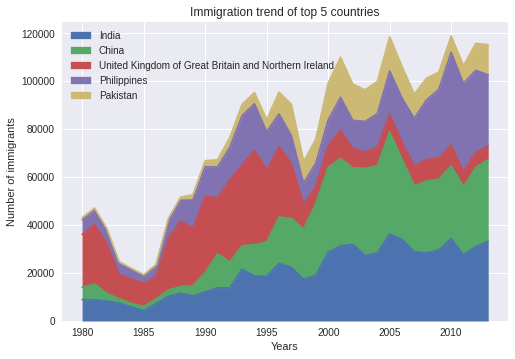

In [266]:
df_top5.plot(kind='area')

plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any `NaN`, i.e. not a number, values will default to 0). To produce an unstacked plot, set parameter `stacked` to value `False`.


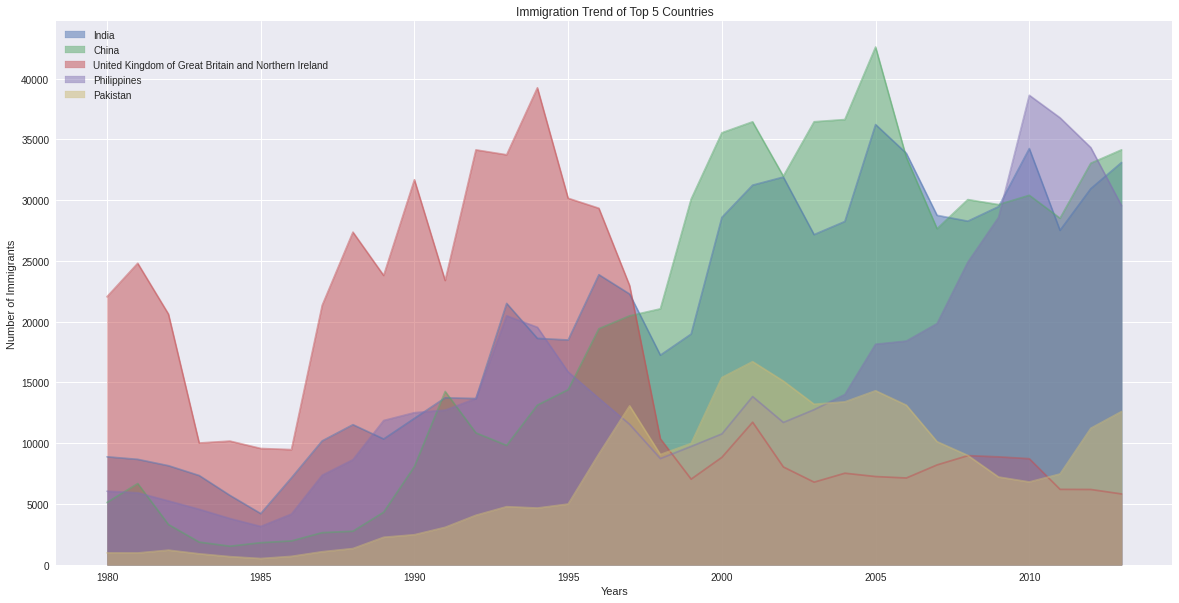

In [267]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Text(0.5, 0, 'Years')

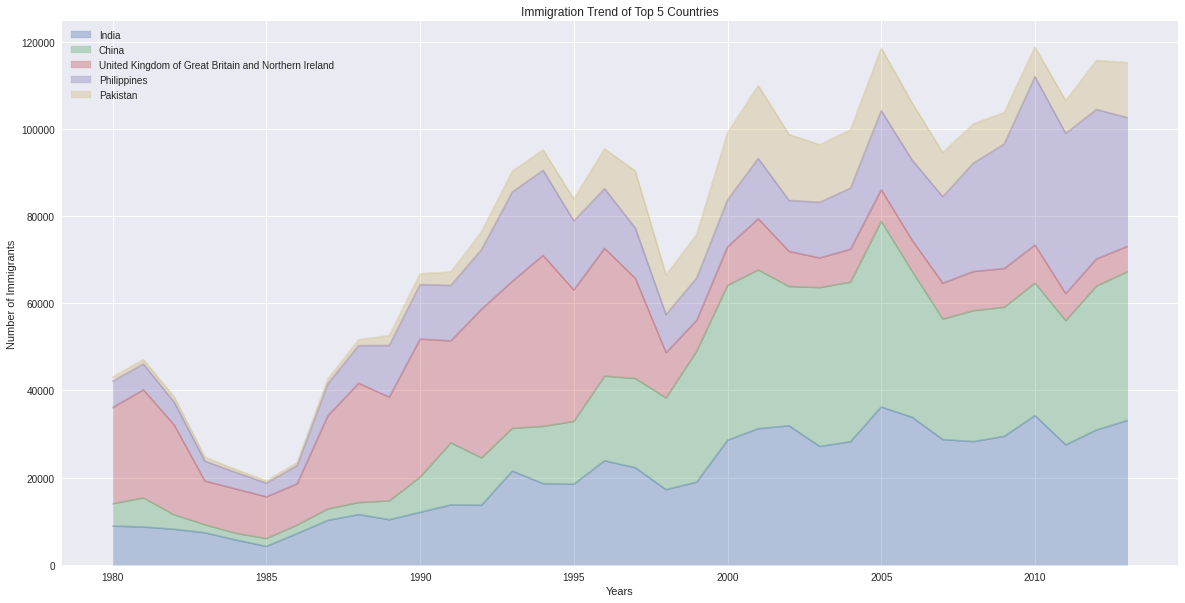

In [268]:
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

#### Histogram

This is a way of representing the frequency distribution of a numeric dataset (variable). It works by partitioning the spread of the numeric data into bins, assign each data point in a dataset to a bin, and then count the number of data point that have been assigned to each bin. So the vertical axis is the frequency or number of data point in each bin.



**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [269]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width=800>


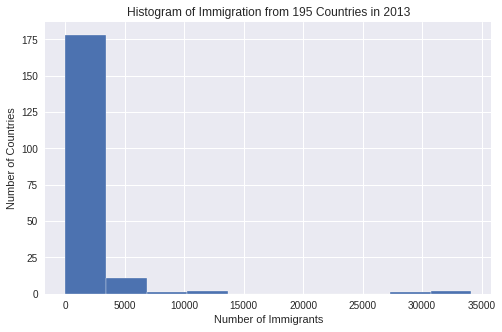

In [270]:
df['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a `xticks` keyword that contains the list of the bin sizes, as follows:


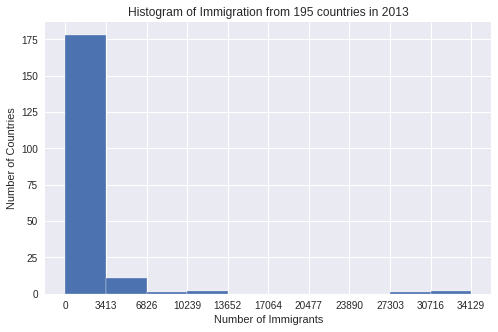

In [271]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df['2013'])

df['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?


In [272]:
# let's quickly view the dataset 
df.loc[['Denmark', 'Norway', 'Sweden'], years]

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Denmark   272   293   299   106    93    73    93   109   129   129  ...   
Norway    116    77   106    51    31    54    56    80    73    76  ...   
Sweden    281   308   222   176   128   158   187   198   171   182  ...   

         2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
Denmark    89    62   101    97   108    81    92    93    94    81  
Norway     73    57    53    73    66    75    46    49    53    59  
Sweden    129   205   139   193   165   167   159   134   140   140  

[3 rows x 34 columns]

In [273]:
# transpose dataframe
df1 = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df1.head()

Denmark  Norway  Sweden
1980      272     116     281
1981      293      77     308
1982      299     106     222
1983      106      51     176
1984       93      31     128

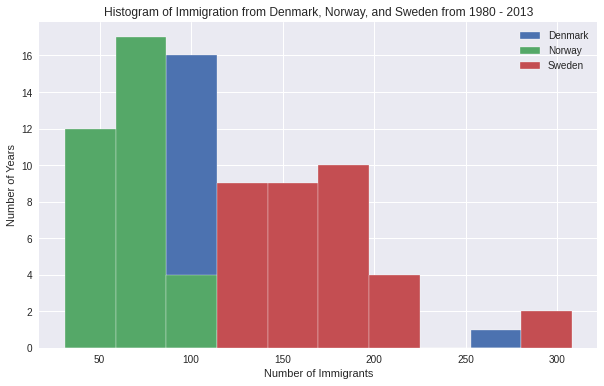

In [274]:
# generate histogram
df1.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

*   increase the bin size to 15 by passing in `bins` parameter;
*   set transparency to 60% by passing in `alpha` parameter;
*   label the x-axis by passing in `x-label` parameter;
*   change the colors of the plots by passing in `color` parameter.


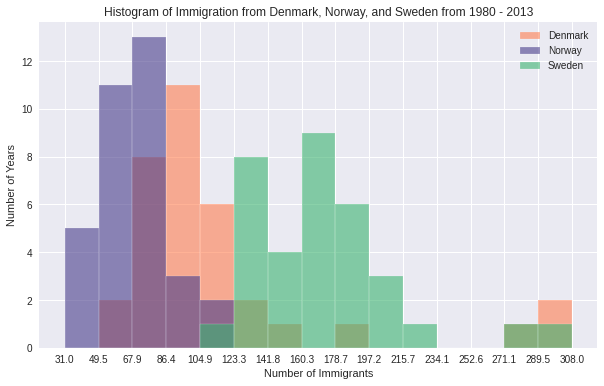

In [275]:
# let's get the x-tick values
count, bin_edges = np.histogram(df1, 15)

# un-stacked histogram
df1.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

If we do not want the plots to overlap each other, we can stack them using the `stacked` parameter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the `xlim` paramater, as show below.


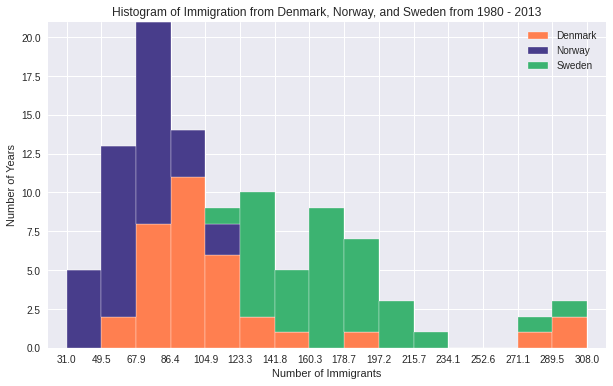

In [276]:
count, bin_edges = np.histogram(df1, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df1.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

#### Bar Chart

Unlike a histogram, a `Bar chart` is commonly used to compare the values of a variable at a given point in time. A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

*   `kind=bar` creates a *vertical* bar plot
*   `kind=barh` creates a *horizontal* bar plot



**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.


In [277]:
df_ice = df.loc['Iceland', years]
df_ice.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

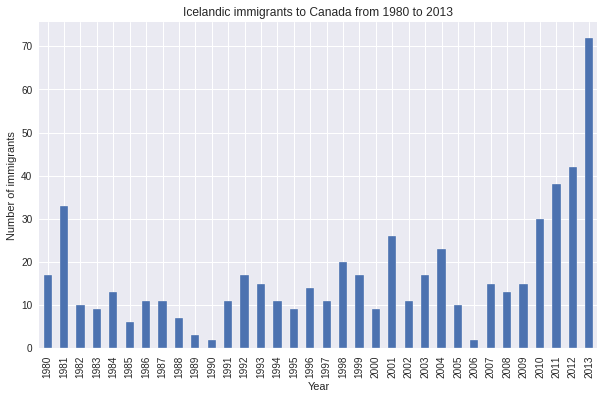

In [278]:
df_ice.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

*   `s`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

I encourage you to read the Matplotlib documentation for more details on annotations:
<http://matplotlib.orsg/api/pyplot_api.html#matplotlib.pyplot.annotate>.

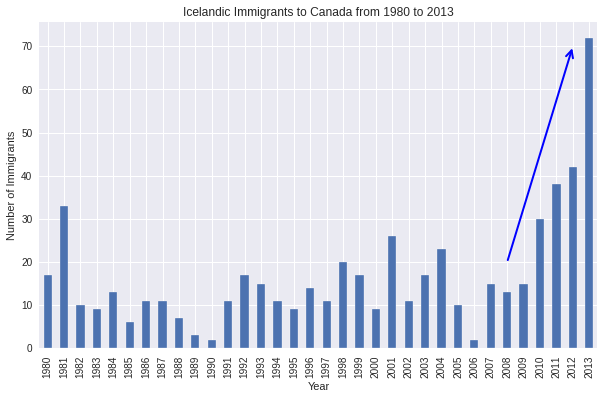

In [279]:
df_ice.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

Let's also annotate a text to go over the arrow.  We will pass in the following additional parameters:

*   `rotation`: rotation angle of text in degrees (counter clockwise)
*   `va`: vertical alignment of text \[‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
*   `ha`: horizontal alignment of text \[‘center’ | ‘right’ | ‘left’]


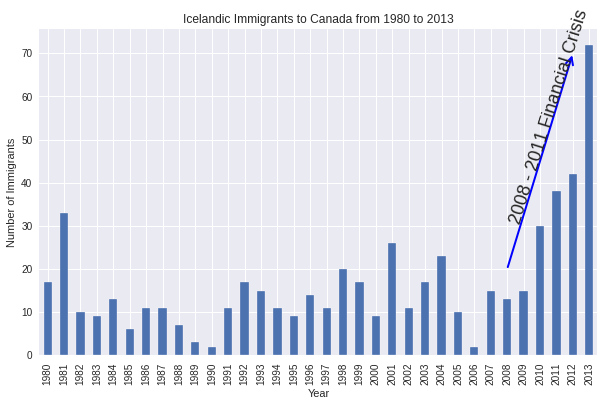

In [280]:
df_ice.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

**Horizontal Bar Plot**

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. As you will see, there is more room on the y-axis to  label categorical variables.

**Question:** Using the scripting later and the `df_can` dataset, create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.


In [281]:
 # sort dataframe on 'Total' column (descending)
df.sort_values(by='Total', ascending=True, inplace=True)

    # get top 15 countries
df_top15 = df['Total'].tail(15)
df_top15

Romania                                                  96317
Viet Nam                                                 99903
Jamaica                                                 109152
France                                                  111826
Lebanon                                                 118118
Poland                                                  141973
Republic of Korea                                       145324
Sri Lanka                                               155696
Iran (Islamic Republic of)                              183261
United States of America                                243833
Pakistan                                                248938
Philippines                                             514148
United Kingdom of Great Britain and Northern Ireland    554233
China                                                   662705
India                                                   699242
Name: Total, dtype: int64

Step 2: Plot data:

1.  Use `kind='barh'` to generate a bar chart with horizontal bars.
2.  Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
3.  Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.


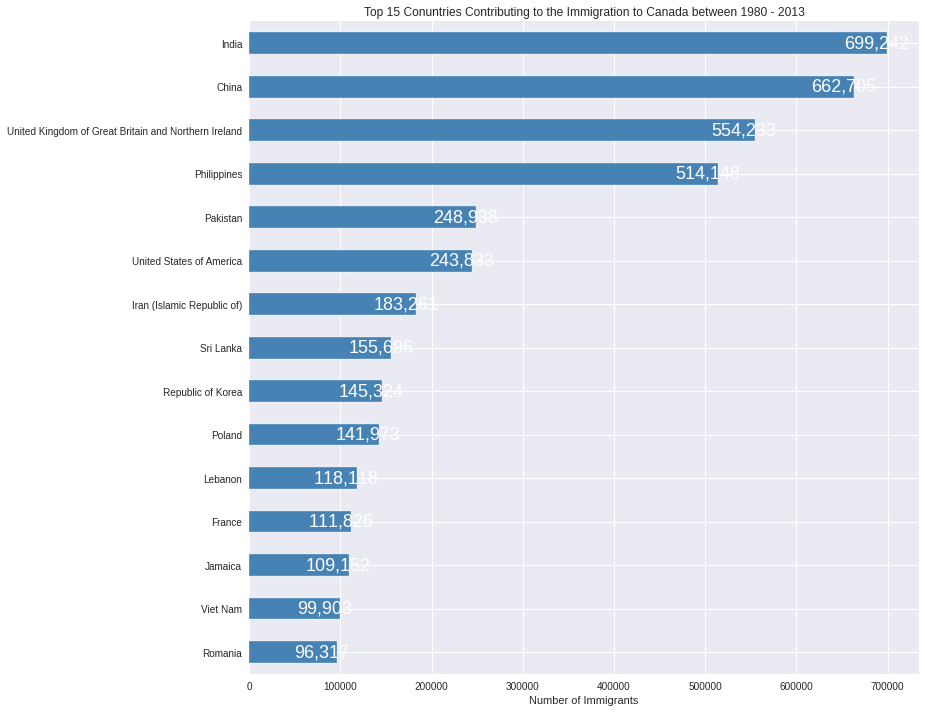

In [282]:
 # generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

    # annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()


### Specialized Visualizaton Tools

#### Pie Chart

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.


Step 1: Gather data.

We will use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combining the results into a data structure.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height=400 align="center">


In [283]:
# group countries by continents and apply sum() function 
continents = df.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df.groupby('Continent', axis=0)))

continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


1980   1981   1982   1983   1984   1985  \
Continent                                                                   
Africa                            3951   4363   3819   2671   2639   2650   
Asia                             31025  34314  30214  24696  27274  23850   
Europe                           39760  44802  42720  24638  22287  20844   
Latin America and the Caribbean  13081  15215  16769  15427  13678  15171   
Northern America                  9378  10030   9074   7100   6661   6543   

                                  1986   1987   1988   1989  ...    2005  \
Continent                                                    ...           
Africa                            3782   7494   7552   9894  ...   27523   
Asia                             28739  43203  47454  60256  ...  159253   
Europe                           24370  46698  54726  60893  ...   35955   
Latin America and the Caribbean  21179  28471  21924  25060  ...   24747   
Northern America                  7074   7705   6469   6790  ...    8394   

                                   2006    2007    2008    2009    2010  \
Continent                                                                 
Africa                            29188   28284   29890   34534   40892   
Asia                             149054  133459  139894  141434  163845   
Europe                            33053   33495   34692   35078   33425   
Latin America and the Caribbean   24676   26011   26547   26867   28818   
Northern America                   9613    9463   10190    8995    8142   

                                   2011    2012    2013    Total  
Continent                                                         
Africa                            35441   38083   38543   765660  
Asia                             146894  152218  155075  3516953  
Europe                            26778   29177   28691  1528488  
Latin America and the Caribbean   27856   27173   24950   855141  
Northern America                   7677    7892    8503   246564  

[5 rows x 35 columns]

Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

*   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


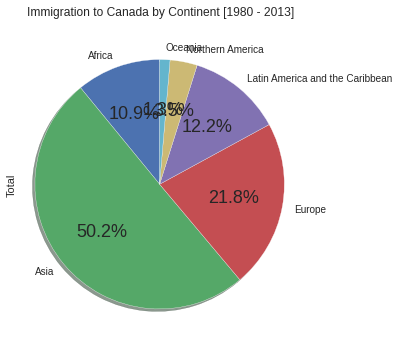

In [284]:
# autopct create %, start angle represent starting point
continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

*   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
*   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
*   Pass in a custom set of colors for continents by passing in `colors` parameter.
*   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in `explode` parameter.


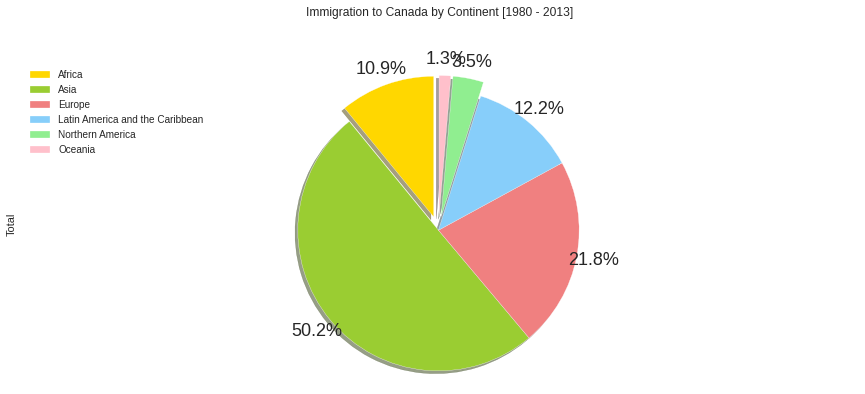

In [285]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=continents.index, loc='upper left') 

plt.show()

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

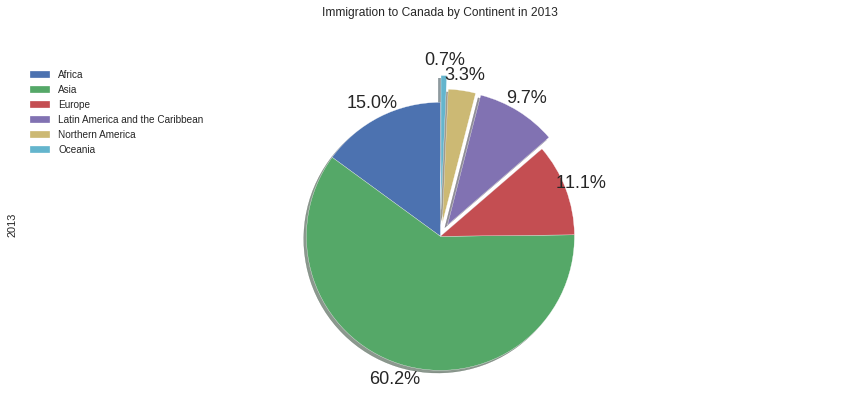

In [286]:
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            explode=explode_list         # 'explode' lowest 3 continents
                                )

    # scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

    # add legend
plt.legend(labels=continents.index, loc='upper left') 

    # show plot
plt.show()


#### Box Plot


A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width=440, align="center">


To make a boxplot, we can use kind=box in plot method invoked on a pandas series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

Get the subset of the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the dataframe.describe() method to view the percentiles.

In [287]:
df_japan = df.loc[['Japan'], years].transpose()
df_japan.head()

Japan
1980    701
1981    756
1982    598
1983    309
1984    246

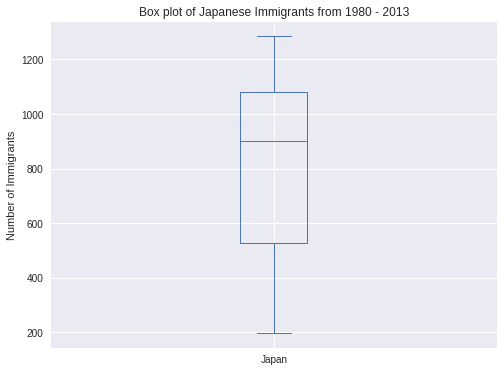

In [288]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can immediately make a few key observations from the plot above:

1.  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of \~500 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of \~1100 or fewer (Third quartile).

One of the key benefits of box plots is comparing the distribution of multiple datasets. In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyze these two countries further using box plots.

**Question**: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.



In [289]:
df_CI= df.loc[['China', 'India'], years].transpose()
df_CI.head()

China  India
1980   5123   8880
1981   6682   8670
1982   3308   8147
1983   1863   7338
1984   1527   5704

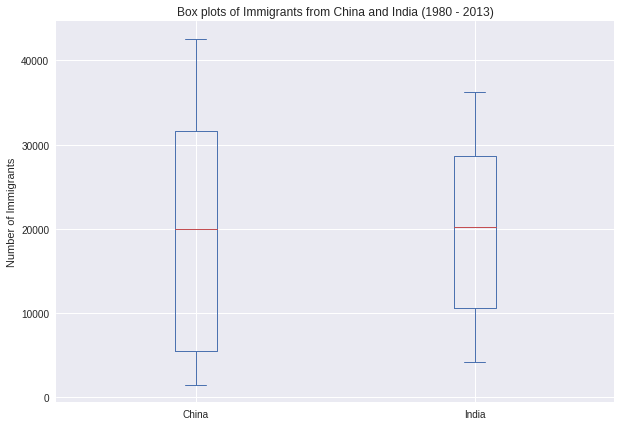

In [290]:
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

If you prefer to create horizontal box plots, you can pass the `vert` parameter in the **plot** function and assign it to *False*. You can also specify a different color in case you are not a big fan of the default red color.


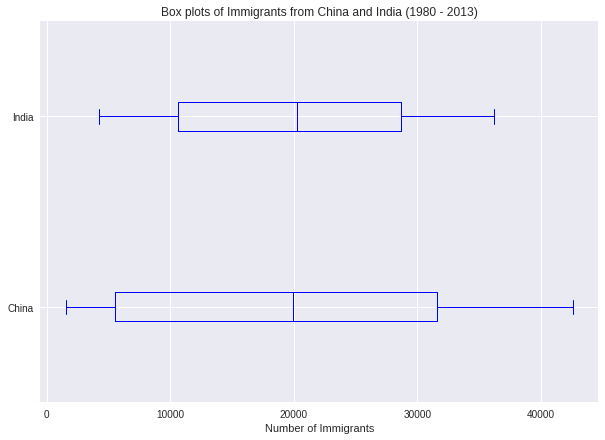

In [291]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Question**: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [292]:
df_top15 = df.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

Continent  \
India                                                                          Asia   
China                                                                          Asia   
United Kingdom of Great Britain and Northern Ir...                           Europe   
Philippines                                                                    Asia   
Pakistan                                                                       Asia   
United States of America                                           Northern America   
Iran (Islamic Republic of)                                                     Asia   
Sri Lanka                                                                      Asia   
Republic of Korea                                                              Asia   
Poland                                                                       Europe   
Lebanon                                                                        Asia   
France                                                                       Europe   
Jamaica                                             Latin America and the Caribbean   
Viet Nam                                                                       Asia   
Romania                                                                      Europe   

                                                                Region  \
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   
United States of America                              Northern America   
Iran (Islamic Republic of)                               Southern Asia   
Sri Lanka                                                Southern Asia   
Republic of Korea                                         Eastern Asia   
Poland                                                  Eastern Europe   
Lebanon                                                   Western Asia   
France                                                  Western Europe   
Jamaica                                                      Caribbean   
Viet Nam                                            South-Eastern Asia   
Romania                                                 Eastern Europe   

                                                               DevName   1980  \
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   
United States of America                             Developed regions   9378   
Iran (Islamic Republic of)                          Developing regions   1172   
Sri Lanka                                           Developing regions    185   
Republic of Korea                                   Developing regions   1011   
Poland                                               Developed regions    863   
Lebanon                                             Developing regions   1409   
France                                               Developed regions   1729   
Jamaica                                             Developing regions   3198   
Viet Nam                                            Developing regions   1191   
Romania                                              Developed regions    375   

                                                     1981   1982   1983  \
India                                                8670   8147   7338   
China                                            

Create a new dataframe which contains the aggregate for each decade. One way to do that:

1.  Create a list of all years in decades 80's, 90's, and 00's.
2.  Slice the original dataframe df to create a series for each decade and sum across all years for each country.
3.  Merge the three series into a new data frame. Call your dataframe **new_df**.


In [293]:
 # create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

    # slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

    # merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

    # display dataframe
new_df.head()

1980s   1990s   2000s
India                                                82154  180395  303591
China                                                32003  161528  340385
United Kingdom of Great Britain and Northern Ir...  179171  261966   83413
Philippines                                          60764  138482  172904
Pakistan                                             10591   65302  127598

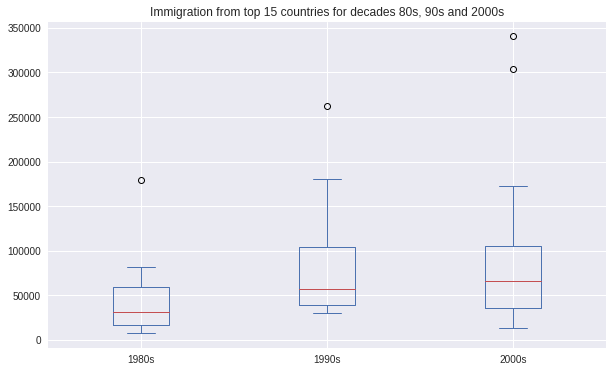

In [294]:
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 \* 69,404) <br>
Outlier > 209,611.5


#### Sub Plot

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.



Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width=500 align="center">


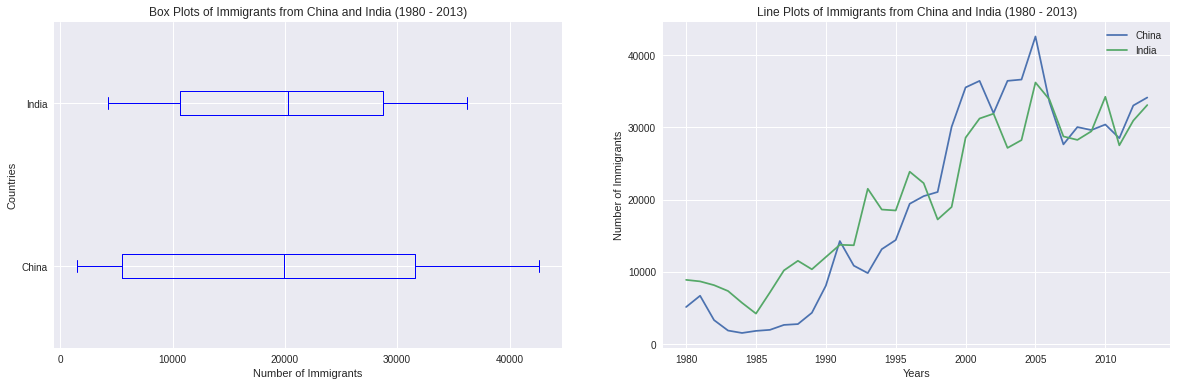

In [295]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

**Tip regarding subplot convention**

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).


#### Scatter Plot

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.



Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.
Get the dataset. Since we are expecting to use the relationship betewen `years` and `total population`, we will convert `years` to `int` type.

In [296]:
# we can use the sum() method to get the total population per year
df_pop = pd.DataFrame(df[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_pop.index = map(int, df_pop.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_pop.reset_index(inplace = True)

# rename columns
df_pop.columns = ['year', 'total']

# view the final dataframe
df_pop.head()

year   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

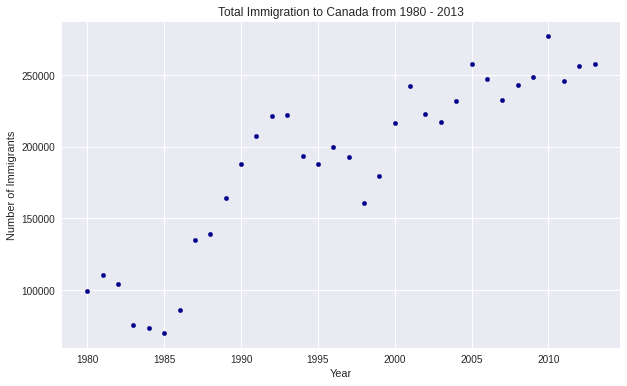

In [297]:
df_pop.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Notice how the scatter plot does not connect the data  points together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).

So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:

*   `x`: x-coordinates of the data.
*   `y`: y-coordinates of the data.
*   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.


In [298]:
x = df_pop['year']      # year on x-axis
y = df_pop['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

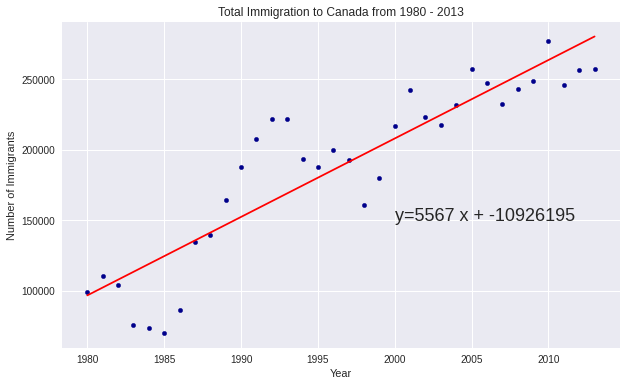

'No. Immigrants = 5567 * Year + -10926195'

In [299]:
df_pop.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```

When compared to the actual from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

1.  Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
2.  Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
3.  Reset the index in place.
4.  Rename the columns to **year** and **total**.
5.  Display the resulting dataframe.

In [300]:
countries = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # create df_total by summing across three countries for each year
df_total = pd.DataFrame(countries.sum(axis=1))

    # reset index in place
df_total.reset_index(inplace=True)

    # rename columns
df_total.columns = ['year', 'total']

    # change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

    # show resulting dataframe
df_total.head()

year  total
0  1980    669
1  1981    678
2  1982    627
3  1983    333
4  1984    252

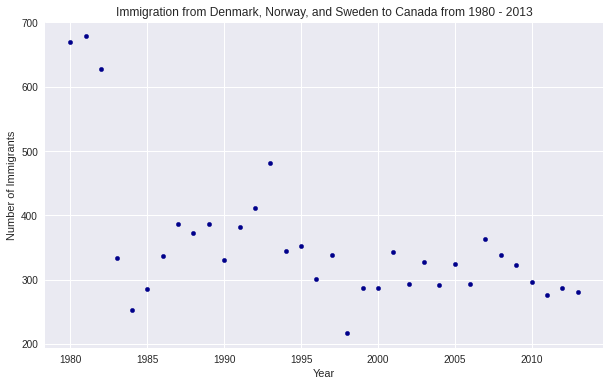

In [301]:
 # generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

    # add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

    # show plot
plt.show()

#### Bubble Plot

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable `z`, also known as the weight. In `maplotlib`, we can pass in an array or scalar to the parameter `s` to `plot()`, that contains the weight of each point.



**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.


In [302]:
# transposed dataframe
df_t = df[years].transpose()

# cast the Years (the index) to type int
df_t.index = map(int, df_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_t.reset_index(inplace=True)

# view the changes
df_t.head()

Year  Western Sahara  Sao Tome and Principe  Canada  San Marino  \
0  1980               0                      0       0           1   
1  1981               0                      0       0           0   
2  1982               0                      0       0           0   
3  1983               0                      0       0           0   
4  1984               0                      0       0           0   

   New Caledonia  Andorra  Vanuatu  Monaco  Palau  ...  Poland  \
0              0        0        0       0      0  ...     863   
1              0        0        0       0      0  ...    2930   
2              0        0        0       0      0  ...    5881   
3              0        0        0       0      0  ...    4546   
4              0        0        0       0      0  ...    3588   

   Republic of Korea  Sri Lanka  Iran (Islamic Republic of)  \
0               1011        185                        1172   
1               1456        371                        1429   
2               1572        290                        1822   
3               1081        197                        1592   
4                847       1086                        1977   

   United States of America  Pakistan  Philippines  \
0                      9378       978         6051   
1                     10030       972         5921   
2                      9074      1201         5249   
3                      7100       900         4562   
4                      6661       668         3801   

   United Kingdom of Great Britain and Northern Ireland  China  India  
0                                              22045      5123   8880  
1                                              24796      6682   8670  
2                                              20620      3308   8147  
3                                              10015      1863   7338  
4                                              10170      1527   5704  

[5 rows x 196 columns]

 Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) to bring all values into the range \[0, 1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.


In [303]:
norm_brazil = (df_t['Brazil'] - df_t['Brazil'].min()) / (df_t['Brazil'].max() - df_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_t['Argentina'] - df_t['Argentina'].min()) / (df_t['Argentina'].max() - df_t['Argentina'].min())

Plot the data.

*   To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.
*   We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
    *   multiply weights by 2000 to scale it up on the graph, and,
    *   add 10 to compensate for the min value (which has a 0 weight and therefore scale with $\times 2000$).


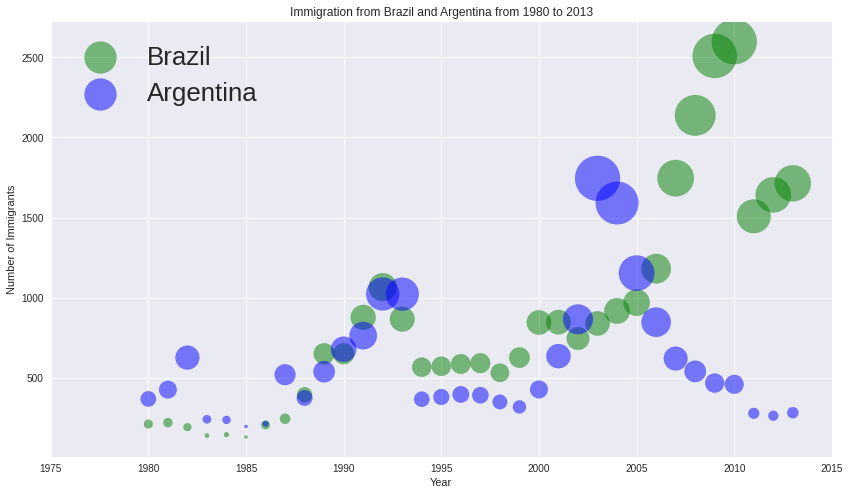

In [304]:
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.


### Advanced Visualization Tools

#### Waffle Charts

A waffle charts is an interesting visualization that is normally created to display progress towards goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard

Unfortunately, unlike R, waffle charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.

**Step 1**. The first step into creating a waffle chart is determing the proportion of each category with respect to the total.




In [305]:
# let's create a new dataframe for these three countries 
df_dsn = df.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

# compute the proportion of each category with respect to the total
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

Category Proportion
Denmark             0.326911
Norway              0.249347
Sweden              0.423742

**Step 2**. The second step is defining the overall size of the waffle chart.

In [306]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles


In [307]:
# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

Number of tiles
Denmark              131
Norway               100
Sweden               169

**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.


In [308]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [309]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

**Step 5.** Map the `waffle` chart matrix into a visual.


<Figure size 576x396 with 0 Axes>

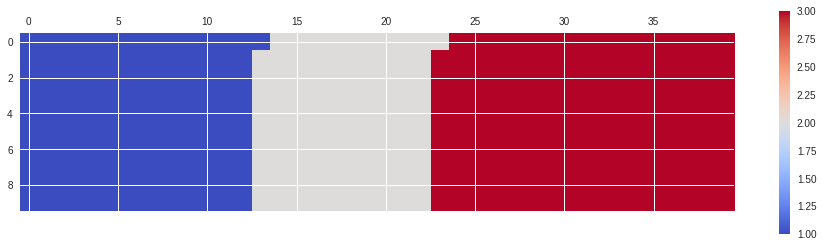

In [310]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

**Step 6.** Prettify the chart.


<Figure size 576x396 with 0 Axes>

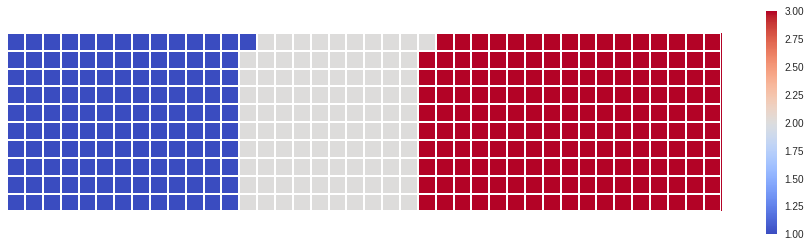

In [311]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

**Step 7.** Create a legend and add it to chart.


<Figure size 576x396 with 0 Axes>

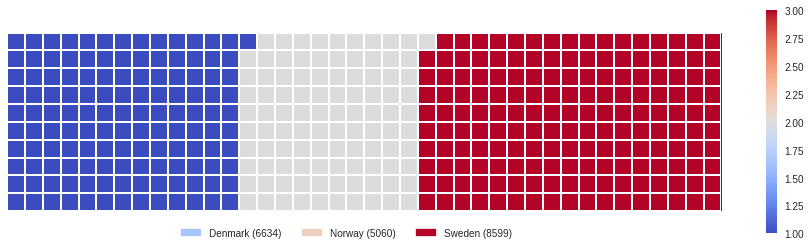

In [312]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

Now it would very inefficient to repeat these seven steps every time we wish to create a `waffle` chart. So let's combine all seven steps into one function called *create_waffle_chart*. This function would take the following parameters as input:

> 1.  **categories**: Unique categories or classes in dataframe.
> 2.  **values**: Values corresponding to categories or classes.
> 3.  **height**: Defined height of waffle chart.
> 4.  **width**: Defined width of waffle chart.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.


In [313]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

Now to create a `waffle` chart, all we have to do is call the function `create_waffle_chart`. Let's define the input parameters:


In [314]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 131
Norway: 100
Sweden: 169


<Figure size 576x396 with 0 Axes>

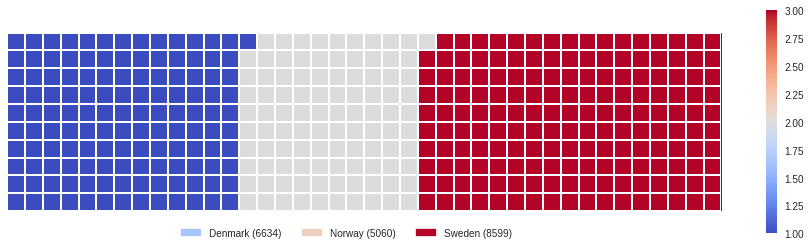

In [315]:
create_waffle_chart(categories, values, height, width, colormap)

#### Word Cloud

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

Word clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by Lewis Carroll titled Alice's Adventures in Wonderland. Let's go ahead and download a .txt file of the novel.

In [316]:
# open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

Next, let's use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.

In [317]:
stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.


In [318]:
# instantiate a word cloud object
alice_wc = WordCloud(
      background_color='white',
      max_words=2000,
      stopwords=stopwords
 )

# generate the word cloud
alice_wc.generate(alice_novel)

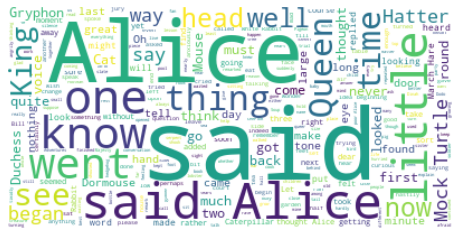

In [319]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little**, **Queen**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.


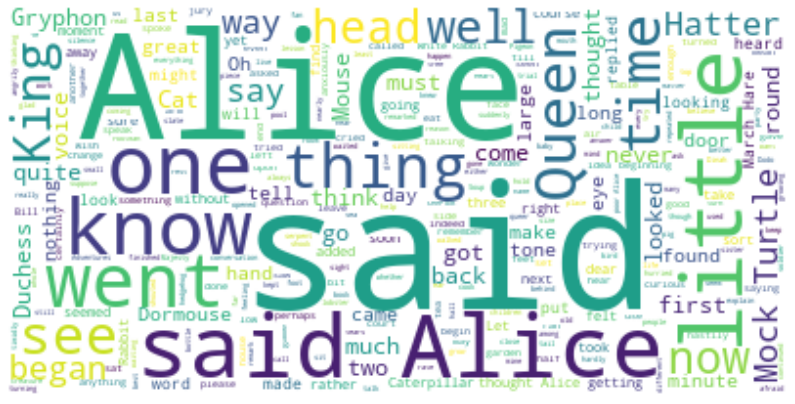

In [320]:
fig = plt.figure(figsize=(14, 18))

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.


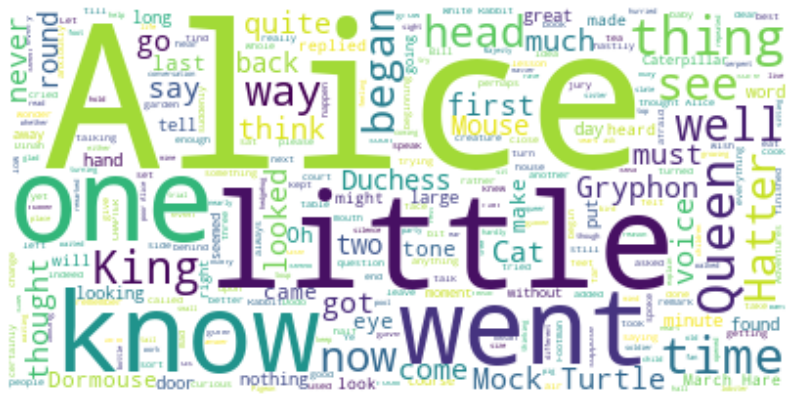

In [321]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Excellent! This looks really interesting! Another cool thing you can implement with the `word_cloud` package is superimposing the words onto a mask of any shape. Let's use a mask of Alice and her rabbit

In [322]:
# save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

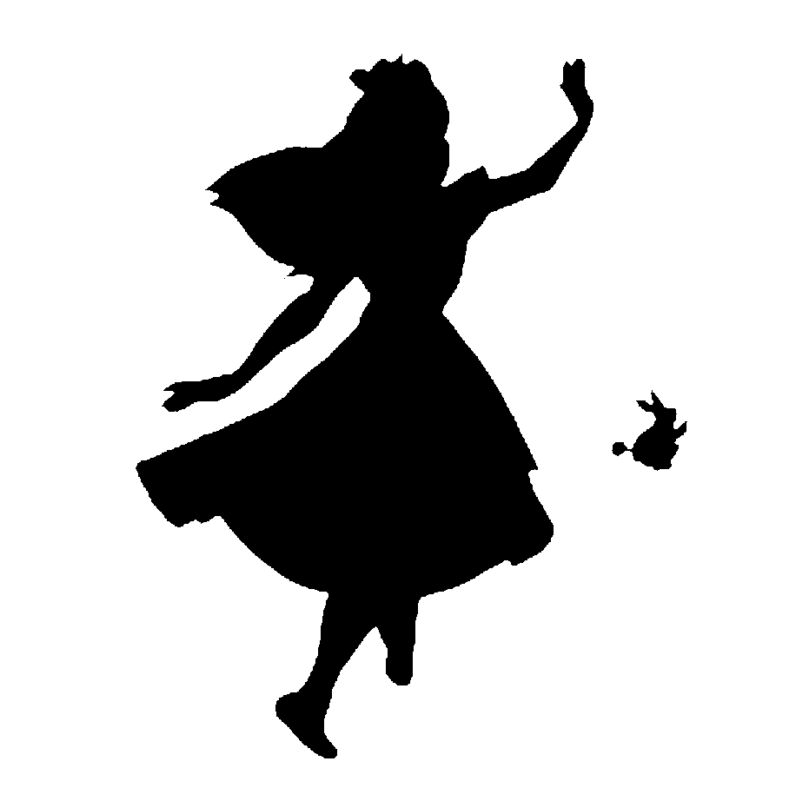

In [323]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words in the novel.


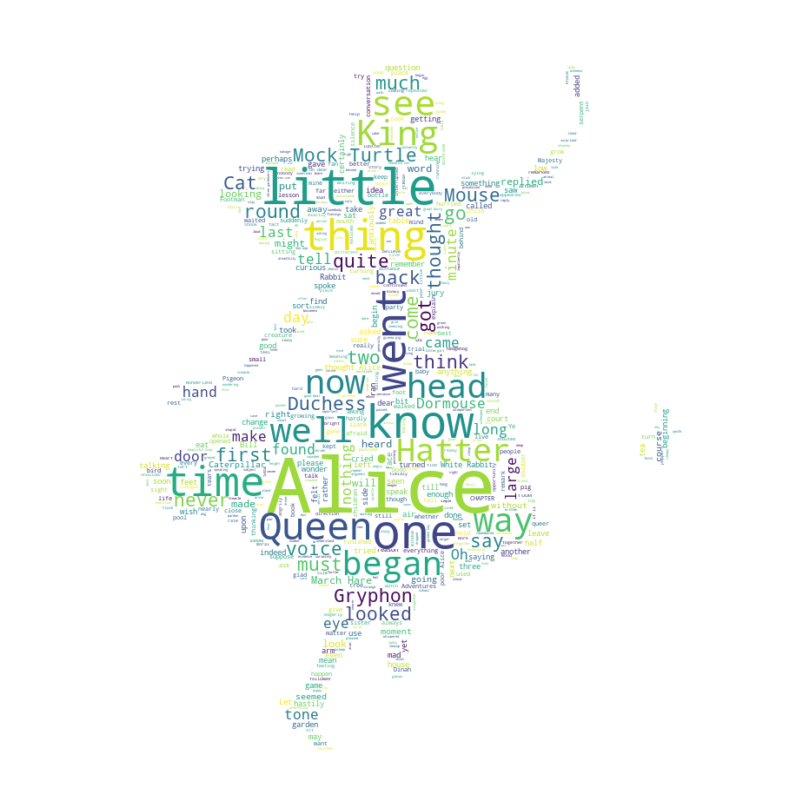

In [324]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Regression Plot


> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about *seaborn* by following this [link](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) and more about *seaborn* regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).


With *seaborn*, generating a regression plot is as simple as calling the **regplot** function.


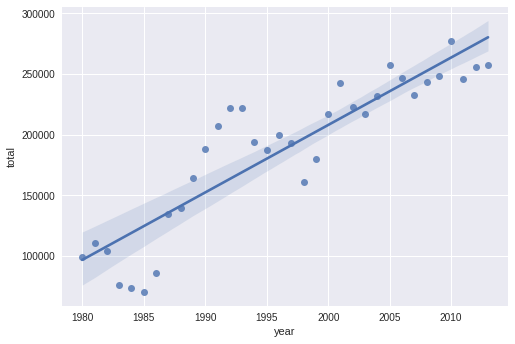

In [325]:
sns.regplot(x='year', y='total', data=df_pop)

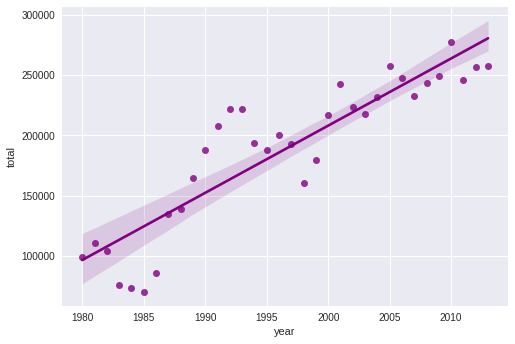

In [326]:
sns.regplot(x='year', y='total', data=df_pop, color='Purple')
plt.show()

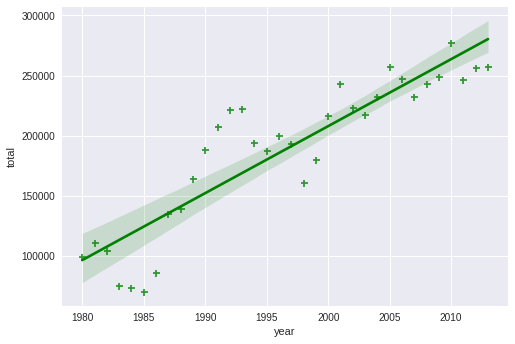

In [327]:
ax = sns.regplot(x='year', y='total', data=df_pop, color='green', marker='+')
plt.show()

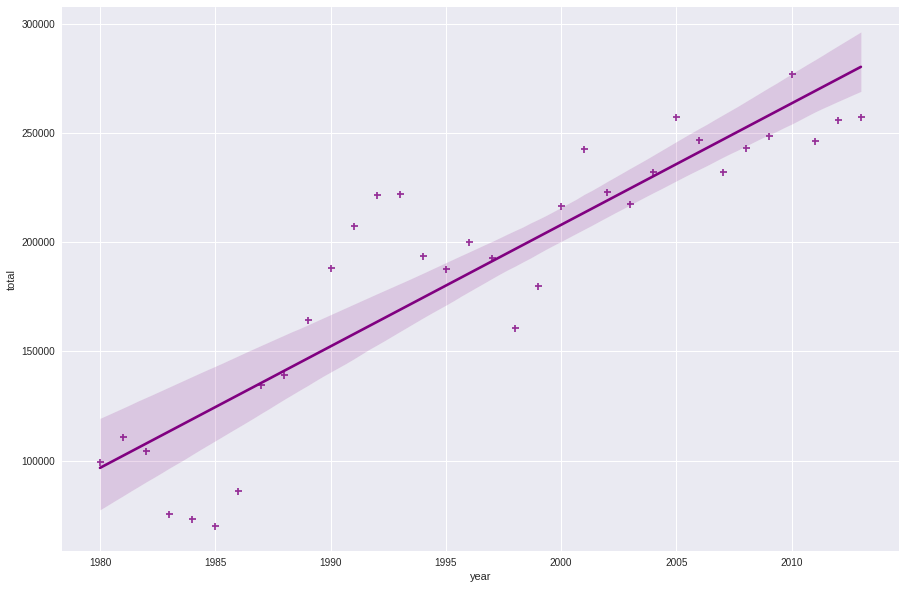

In [328]:
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_pop, color='Purple', marker='+')
plt.show()

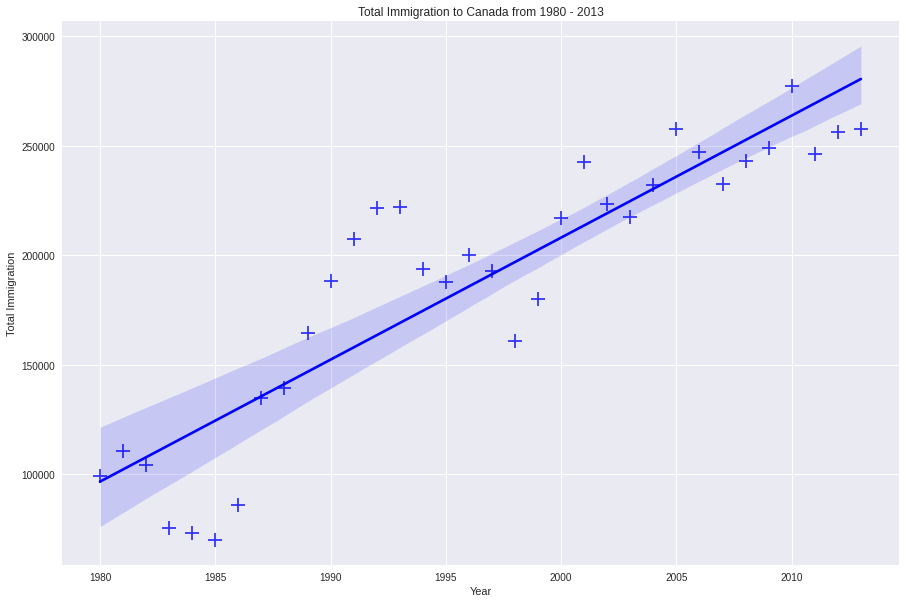

In [329]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_pop, color='Blue', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()

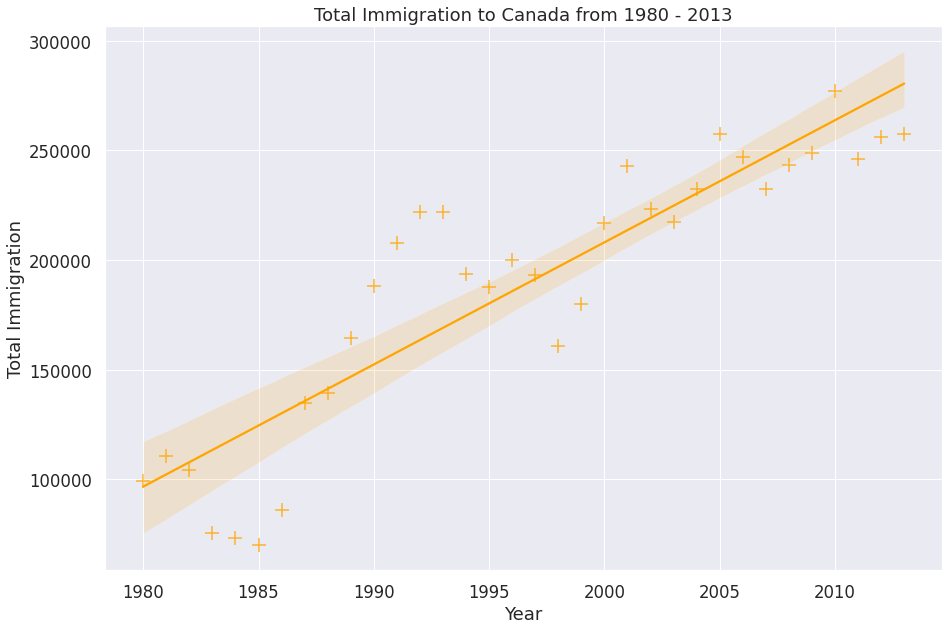

In [330]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_pop, color='orange', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

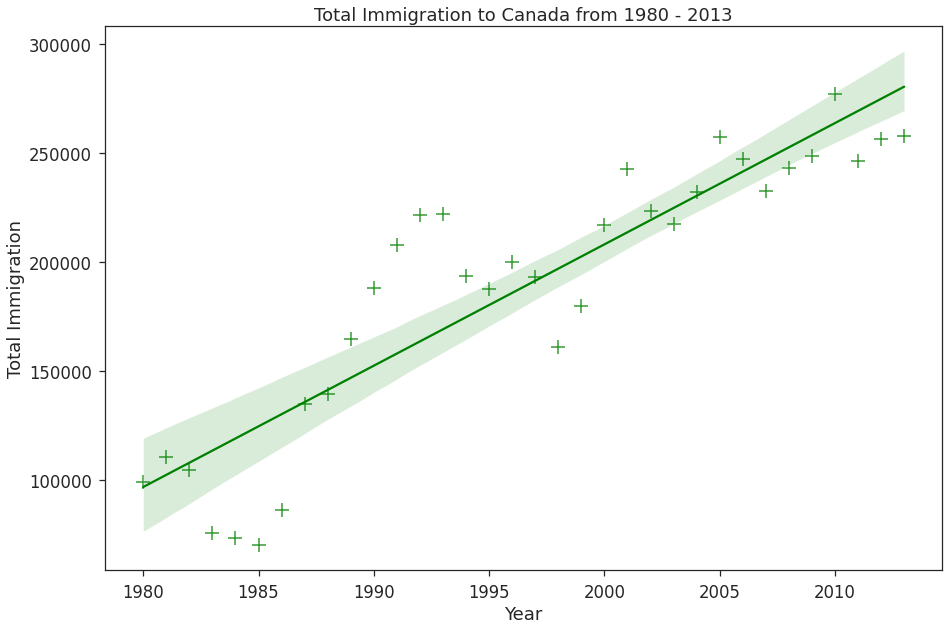

In [331]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background to white background

ax = sns.regplot(x='year', y='total', data=df_pop, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

### Geospatial Visualization



#### Folium 

Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.



From the official Folium documentation page:

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

> Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

> The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.


Generating the world map is straightforward in **Folium**. You simply create a **Folium** *Map* object, and then you display it. What is attractive about **Folium** maps is that they are interactive, so you can zoom into any region of interest despite the initial zoom level.

In [332]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [333]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# display world map
world_map

Let's create the map again with a higher zoom level.

In [334]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[56.130, -106.35], zoom_start=8)

# display world map
world_map

Another cool feature of Folium is that you can generate different map styles.

##### Stamen Toner Maps

These are high-contrast B+W (black and white) maps. They are perfect for data mashups and exploring river meanders and coastal zones.

In [335]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Toner')

# display map
world_map

#####  Stamen Terrain Maps

These are maps that feature hill shading and natural vegetation colors. They showcase advanced labeling and linework generalization of dual-carriageway roads.


In [336]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map

##### Maps with Markers 
Let's download and import the data on police department incidents using pandas read_csv() method.

In [337]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv'

df =  pd.read_csv(URL)

In [338]:
df.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

So each row consists of 13 features:

> 1.  **IncidntNum**: Incident Number
> 2.  **Category**: Category of crime or incident
> 3.  **Descript**: Description of the crime or incident
> 4.  **DayOfWeek**: The day of week on which the incident occurred
> 5.  **Date**: The Date on which the incident occurred
> 6.  **Time**: The time of day on which the incident occurred
> 7.  **PdDistrict**: The police department district
> 8.  **Resolution**: The resolution of the crime in terms whether the perpetrator was arrested or not
> 9.  **Address**: The closest address to where the incident took place
> 10. **X**: The longitude value of the crime location
> 11. **Y**: The latitude value of the crime location
> 12. **Location**: A tuple of the latitude and the longitude values
> 13. **PdId**: The police department ID


In [339]:
df.shape

(150500, 13)

In [340]:
# get the first 1000 crimes in the df dataframe
limit = 100
df = df.iloc[0:limit, :]

In [341]:
df.shape

(100, 13)

In [342]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [343]:
sf_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sf_map

Now let's superimpose the locations of the crimes onto the map. The way to do that in **Folium** is to create a *feature group* with its own features and style and then add it to the `sf_map`.


In [344]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df.Y, df.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sf_map.add_child(incidents)

You can also add some pop-up text that would get displayed when you hover over a marker. Let's make each marker display the category of the crime when hovered over.

In [345]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df.Y, df.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df.Y)
longitudes = list(df.X)
labels = list(df.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sf_map)    
    
# add incidents to map
sf_map.add_child(incidents)

Isn't this really cool? Now you are able to know what crime category occurred at each marker.

If you find the map to be so congested will all these markers, there are two remedies to this problem. The simpler solution is to remove these location markers and just add the text to the circle markers themselves as follows:

In [346]:
# create map and display it
sf_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df.Y, df.X, df.Category):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sf_map)

# show map
sf_map

The other proper remedy is to group the markers into different clusters. Each cluster is then represented by the number of crimes in each neighborhood. These clusters can be thought of as pockets of San Francisco which you can then analyze separately.

To implement this, we start off by instantiating a MarkerCluster object and adding all the data points in the dataframe to this object.



In [347]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sf_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sf_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df.Y, df.X, df.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sf_map

Notice how when you zoom out all the way, all markers are grouped into one cluster, the global cluster, of 100 markers or crimes, which is the total number of crimes in our dataframe. Once you start zooming in, the global cluster will start breaking up into smaller clusters. Zooming in all the way will result in individual markers.

#### Choropleth Maps

A `Choropleth` map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. The choropleth map provides an easy way to visualize how a measurement varies across a geographic area, or it shows the level of variability within a region. Below is a `Choropleth` map of the US depicting the population by square mile per state.




<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%205/images/2000_census_population_density_map_by_state.png" width = 600> 

Now, let's create our own Choropleth map of the world depicting immigration from various countries to Canada.



In [348]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'

df = pd.read_excel(URL, sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

df.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [349]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

# add total column
df['Total'] = df.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df.shape)

data dimensions: (195, 39)


<ipython-input-349-63578fa940ca>:11: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [350]:
df.head(2)

Country Continent           Region             DevName  1980  1981  \
0  Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1      Albania    Europe  Southern Europe   Developed regions     1     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  15699  

[2 rows x 39 columns]

In order to create a Choropleth map, we need a GeoJSON file that defines the areas/boundaries of the state, county, or country that we are interested in. In our case, since we are endeavoring to create a world map, we want a GeoJSON that defines the boundaries of all world countries. For your convenience, we will be providing you with this file, so let's go ahead and load it.

In [351]:
with open('/content/world_countries.json', 'r') as f:
  world_geo = json.load(f)

print('GeoJSON file loaded!')

GeoJSON file loaded!


In [352]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

And now to create a `Choropleth` map, we will use the *choropleth* method with the following main parameters:

1.  `geo_data`, which is the GeoJSON file.
2.  `data`, which is the dataframe containing the data.
3.  `columns`, which represents the columns in the dataframe that will be used to create the `Choropleth` map.
4.  `key_on`, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, **name** is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.


In [353]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

/usr/local/lib/python3.8/dist-packages/folium/folium.py:409: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



As per our Choropleth map legend, the darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the US.

Notice how the legend is displaying a negative boundary or threshold. Let's fix that by defining our own thresholds and starting with 0 instead of -6,918!

In [354]:
# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df['Total'].min(),
                              df['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

In [355]:

folium.Map(location=[40.4637, -3.7492], zoom_start=6, tiles='Stamen Terrain')

### Dashboards with Plotly and Dash

#### Basic Plotly Charts



In [356]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv'

air_df =  pd.read_csv(URL,
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})


In [357]:
air_df.head()

Unnamed: 0  Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate  \
0     1295781  1998        2      4           2          4  1998-04-02   
1     1125375  2013        2      5          13          1  2013-05-13   
2      118824  1993        3      9          25          6  1993-09-25   
3      634825  1994        4     11          12          6  1994-11-12   
4     1888125  2017        3      8          17          4  2017-08-17   

  Reporting_Airline  DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline  \
0                AS                     19930                          AS   
1                EV                     20366                          EV   
2                UA                     19977                          UA   
3                HP                     19991                          HP   
4                UA                     19977                          UA   

   ... Div4WheelsOff  Div4TailNum  Div5Airport  Div5AirportID  \
0  ...           NaN          NaN          NaN            NaN   
1  ...           NaN          NaN          NaN            NaN   
2  ...           NaN          NaN          NaN            NaN   
3  ...           NaN          NaN          NaN            NaN   
4  ...           NaN          NaN          NaN            NaN   

   Div5AirportSeqID Div5WheelsOn Div5TotalGTime Div5LongestGTime  \
0               NaN          NaN            NaN              NaN   
1               NaN          NaN            NaN              NaN   
2               NaN          NaN            NaN              NaN   
3               NaN          NaN            NaN              NaN   
4               NaN          NaN            NaN              NaN   

   Div5WheelsOff Div5TailNum  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN  

[5 rows x 110 columns]

In [358]:
air_df.shape

(27000, 110)

In [359]:
# Randomly sample 500 data points. Setting the random state to be 42
df_air = air_df.sample(n=500, random_state=42)

In [360]:
df_air.shape

(500, 110)

##### Graph Objects

**Scatter plot** : How departure time changes with respect to airport distance

In [361]:
# First we create a figure using go.Figure and adding trace to it through go.scatter
fig = go.Figure(data=go.Scatter(x=df_air['Distance'], y=df_air['DepTime'], mode='markers', marker=dict(color='red')))
# Updating layout through `update_layout`. Here we are adding title to the plot and providing title to x and y axis.
fig.update_layout(title='Distance vs Departure Time', xaxis_title='Distance', yaxis_title='DepTime')
# Display the figure
fig.show()

**Line plot** : Extract average monthly arrival delay time and see how it changes over the year.

In [362]:
# Group the df_air by Month and compute average over arrival delay time.
line_data = df_air.groupby('Month')['ArrDelay'].mean().reset_index()

In [363]:
line_data

Month   ArrDelay
0       1   2.232558
1       2   2.687500
2       3  10.868421
3       4   6.229167
4       5  -0.279070
5       6  17.310345
6       7   5.088889
7       8   3.121951
8       9   9.081081
9      10   1.200000
10     11  -3.975000
11     12   3.240741

Create a line plot with x-axis being the month and y-axis being computed average delay time. Update plot title,
xaxis, and yaxis title.

Scatter and line plot vary by updating mode parameter.

In [364]:
fig = go.Figure(data=go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
fig.show()

##### Plotly Express

**Bar Chart** : Extract number of flights from a specific airline that goes to a destination

In [365]:
bar_data = df_air.groupby(['DestState'])['Flights'].sum().reset_index()

bar_data

DestState  Flights
0         AK      4.0
1         AL      3.0
2         AZ      8.0
3         CA     68.0
4         CO     20.0
5         CT      5.0
6         FL     32.0
7         GA     27.0
8         HI      5.0
9         IA      1.0
10        ID      1.0
11        IL     33.0
12        IN      6.0
13        KS      1.0
14        KY     14.0
15        LA      4.0
16        MA     10.0
17        MD      7.0
18        MI     16.0
19        MN     11.0
20        MO     18.0
21        MT      3.0
22        NC     13.0
23        NE      2.0
24        NH      1.0
25        NJ      5.0
26        NM      1.0
27        NV     13.0
28        NY     21.0
29        OH      9.0
30        OK      6.0
31        OR      3.0
32        PA     14.0
33        PR      2.0
34        RI      1.0
35        SC      1.0
36        TN     14.0
37        TX     60.0
38        UT      7.0
39        VA     11.0
40        VI      1.0
41        WA     10.0
42        WI      8.0

In [366]:
# Use plotly express bar chart function px.bar. Provide input data, x and y axis variable, and title of the chart.
# This will give total number of flights to the destination state.
fig = px.bar(bar_data, x="DestState", y="Flights", title='Total number of flights to the destination state split by reporting airline') 
fig.show()

**Bubble Chart** : Get number of flights as per reporting airline

In [367]:
# Group the data by reporting airline and get number of flights
bub_data = df_air.groupby('Reporting_Airline')['Flights'].sum().reset_index()

bub_data

Reporting_Airline  Flights
0                 9E      5.0
1                 AA     57.0
2                 AS     14.0
3                 B6     10.0
4                 CO     12.0
5                 DL     66.0
6                 EA      4.0
7                 EV     11.0
8                 F9      4.0
9                 FL      3.0
10                HA      3.0
11                HP      7.0
12                KH      1.0
13                MQ     27.0
14                NK      3.0
15                NW     26.0
16                OH      8.0
17                OO     28.0
18            PA (1)      1.0
19                PI      1.0
20                PS      1.0
21                TW     14.0
22                UA     51.0
23                US     43.0
24                VX      1.0
25                WN     86.0
26                XE      6.0
27                YV      6.0
28                YX      1.0


*   Create a bubble chart using the `bub_data` with x-axis being reporting airline and y-axis being flights.
*   Provide title to the chart
*   Update size of the bubble based on the number of flights. Use `size` parameter.
*   Update name of the hover tooltip to `reporting_airline` using `hover_name` parameter.


In [368]:
fig = px.scatter(bub_data, x="Reporting_Airline", y="Flights", size="Flights",
                 hover_name="Reporting_Airline", title='Reporting Airline vs Number of Flights', size_max=60)
fig.show()

**Histogram** : Get distribution of arrival delay

In [369]:
# Set missing values to 0
df_air['ArrDelay'] = df_air['ArrDelay'].fillna(0)


*   Use px.histogram and pass the dataset.
*   Pass `ArrDelay` to x parameter.


In [370]:
fig = px.histogram(df_air, x="ArrDelay")
fig.show()

**Pie Chart** : Proportion of distance group by month (month indicated by numbers)

In [371]:
# Use px.pie function to create the chart. Input dataset. 
# Values parameter will set values associated to the sector. 'Month' feature is passed to it.
# labels for the sector are passed to the `names` parameter.
fig = px.pie(df_air, values='Month', names='DistanceGroup', title='Distance group proportion by month')
fig.show()

**Sunburst Chart** :  Hierarchical view in othe order of month and destination state holding value of number of flights

*   Create sunburst chart using `px.sunburst`.
*   Define hierarchy of sectors from root to leaves in `path` parameter. Here, we go from `Month` to `DestStateName` feature.
*   Set sector values in `values` paramter. Here, we can pass in `Flights` feature.
*   Show the figure.


In [372]:
fig = px.sunburst(df_air, path=['Month', 'DestStateName'], values='Flights')
fig.show()


#### Dash

 Best dashboards answer critical business questions. It will help business make informed decisions, thereby improving performance. 

- Dashboards can produce real-time visuals. 

- Plotly is an interactive, open-source plotting library that supports over 40 chart types. 

- The web based visualizations created using Plotly python can be displayed in Jupyter notebook, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash. 

- Plotly Graph Objects is the low-level interface to figures, traces, and layout whereas plotly express is a high-level wrapper for Plotly. 

- Dash is an Open-Source User Interface Python library for creating reactive, web-based applications. It is both enterprise-ready and a first-class member of Plotly’s open-source tools. 

- Core and HTML are the two components of dash. 

- The dash_html_components library has a component for every HTML tag. 

- The dash_core_components describe higher-level components that are interactive and are generated with JavaScript, HTML, and CSS through the React.js library. 

- A callback function is a python function that is automatically called by Dash whenever an input component's property changes. Callback function is decorated with `@app.callback` decorator. 

- Callback decorator function takes two parameters: Input and Output. Input and Output to the callback function will have component id and component property. Multiple inputs or outputs should be enclosed inside either a list or tuple. 